In [69]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [70]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()
df_DA['job_posted_month'] = pd.to_datetime(df_DA['job_posted_date']).dt.strftime('%B')
df_DA.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",December
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",October
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},October
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},February


In [71]:
df_DA_explode = df_DA.explode('job_skills')

In [72]:
DA_skills = df_DA_explode.pivot_table(index='job_posted_month',columns='job_skills',aggfunc='size').fillna(0)
DA_skills.reset_index(inplace=True)

In [73]:
DA_skills['job_posted_month_no.'] = pd.to_datetime(DA_skills['job_posted_month'], format='%B').dt.month
DA_skills

job_skills,job_posted_month,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,...,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom,job_posted_month_no.
0,April,155.0,4.0,413.0,22.0,0.0,11.0,8.0,9.0,9.0,...,185.0,14.0,1177.0,8.0,2.0,1.0,0.0,6.0,26.0,4
1,August,197.0,3.0,413.0,21.0,0.0,12.0,10.0,3.0,13.0,...,184.0,11.0,1298.0,0.0,1.0,0.0,0.0,11.0,41.0,8
2,December,144.0,10.0,274.0,28.0,0.0,13.0,0.0,8.0,11.0,...,139.0,8.0,786.0,3.0,5.0,0.0,0.0,2.0,37.0,12
3,February,169.0,2.0,448.0,49.0,0.0,14.0,1.0,4.0,27.0,...,202.0,6.0,1235.0,4.0,2.0,5.0,0.0,4.0,41.0,2
4,January,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,...,228.0,6.0,1778.0,0.0,11.0,6.0,0.0,9.0,95.0,1
5,July,207.0,4.0,366.0,15.0,0.0,8.0,5.0,8.0,19.0,...,161.0,11.0,1069.0,0.0,3.0,0.0,0.0,6.0,38.0,7
6,June,164.0,14.0,393.0,29.0,0.0,14.0,9.0,4.0,16.0,...,157.0,14.0,1237.0,6.0,6.0,0.0,0.0,11.0,34.0,6
7,March,181.0,4.0,442.0,34.0,0.0,23.0,6.0,1.0,17.0,...,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0,3
8,May,128.0,8.0,310.0,30.0,0.0,19.0,9.0,2.0,8.0,...,122.0,3.0,957.0,3.0,4.0,0.0,0.0,7.0,18.0,5
9,November,169.0,7.0,293.0,24.0,0.0,19.0,0.0,5.0,4.0,...,144.0,4.0,887.0,1.0,1.0,1.0,0.0,6.0,26.0,11


In [74]:
DA_skills.sort_values('job_posted_month_no.',inplace=True)
DA_skills.set_index('job_posted_month',inplace=True)
DA_skills

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom,job_posted_month_no.
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,228.0,6.0,1778.0,0.0,11.0,6.0,0.0,9.0,95.0,1
February,169.0,2.0,448.0,49.0,0.0,14.0,1.0,4.0,27.0,13.0,...,202.0,6.0,1235.0,4.0,2.0,5.0,0.0,4.0,41.0,2
March,181.0,4.0,442.0,34.0,0.0,23.0,6.0,1.0,17.0,13.0,...,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0,3
April,155.0,4.0,413.0,22.0,0.0,11.0,8.0,9.0,9.0,15.0,...,185.0,14.0,1177.0,8.0,2.0,1.0,0.0,6.0,26.0,4
May,128.0,8.0,310.0,30.0,0.0,19.0,9.0,2.0,8.0,21.0,...,122.0,3.0,957.0,3.0,4.0,0.0,0.0,7.0,18.0,5
June,164.0,14.0,393.0,29.0,0.0,14.0,9.0,4.0,16.0,16.0,...,157.0,14.0,1237.0,6.0,6.0,0.0,0.0,11.0,34.0,6
July,207.0,4.0,366.0,15.0,0.0,8.0,5.0,8.0,19.0,12.0,...,161.0,11.0,1069.0,0.0,3.0,0.0,0.0,6.0,38.0,7
August,197.0,3.0,413.0,21.0,0.0,12.0,10.0,3.0,13.0,12.0,...,184.0,11.0,1298.0,0.0,1.0,0.0,0.0,11.0,41.0,8
September,118.0,4.0,317.0,21.0,0.0,14.0,3.0,10.0,12.0,10.0,...,150.0,8.0,945.0,0.0,1.0,0.0,0.0,5.0,25.0,9


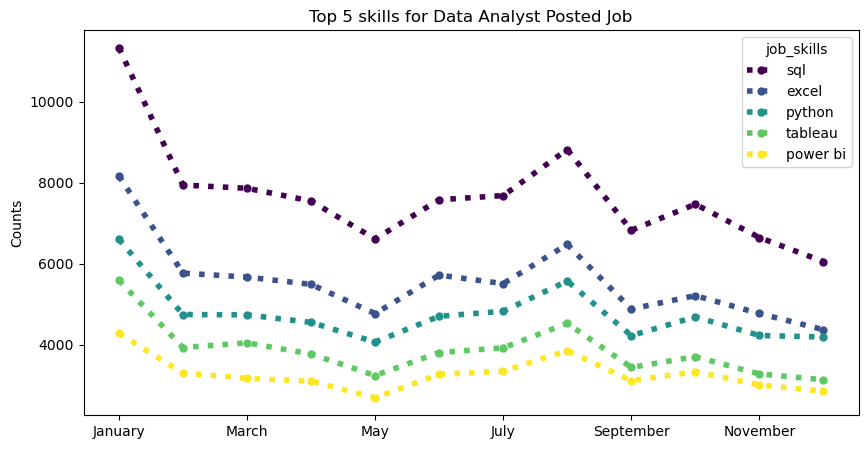

In [75]:
top_skills = df_DA_explode['job_skills'].value_counts().head(5).index.to_list()

DA_skills[top_skills].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-','--','-.',':'
    colormap='viridis', # refer to cheatsheet for different kind of color
    marker='o', # options: 'o','x','+','*','s','1','2', .....
    markersize=5,
    figsize=(10,5)
    )
plt.title('Top 5 skills for Data Analyst Posted Job')
plt.xlabel('')
plt.ylabel('Counts')

plt.show()

# applicable format for the plot can be found in matplotlib pyplot parameter

In [76]:
job_skills = df_DA_explode.groupby('job_skills').agg(
    job_counts = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

df_top_skills = job_skills.sort_values('job_counts',ascending=False).head(20)
df_top_skills


,job_counts,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


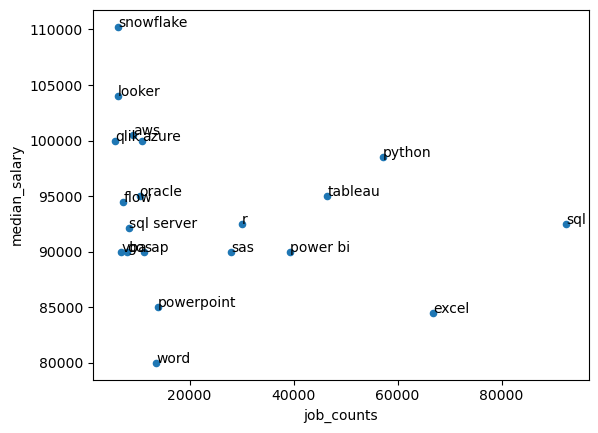

In [77]:
df_top_skills.plot(kind='scatter',x='job_counts',y='median_salary')

for i,txt in enumerate(df_top_skills.index):
    plt.text(x=df_top_skills['job_counts'].iloc[i],y=df_top_skills['median_salary'].iloc[i],s=txt)

plt.show()

In [79]:
from adjustText import adjust_text

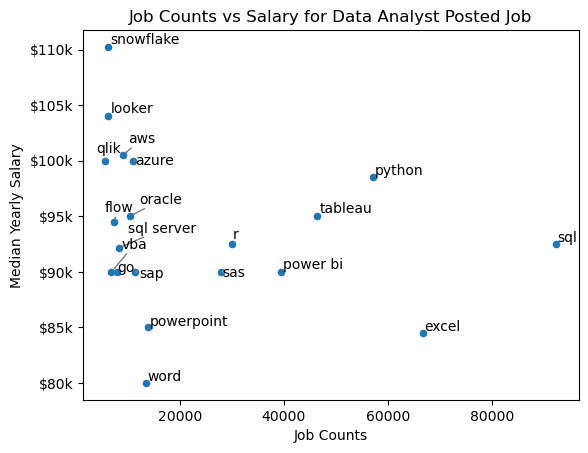

In [90]:
# fig, ax = plt.subplots()

df_top_skills.plot(kind='scatter',x='job_counts',y='median_salary')
texts = []
for i,txt in enumerate(df_top_skills.index):
    texts.append(plt.text(x=df_top_skills['job_counts'].iloc[i],y=df_top_skills['median_salary'].iloc[i],s=txt))
adjust_text(texts,arrowprops=dict(arrowstyle='->', color='gray', lw=1)) # to fit the label

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')) # to format the y axis to $00k

plt.xlabel('Job Counts')
plt.ylabel('Median Yearly Salary')
plt.title('Job Counts vs Salary for Data Analyst Posted Job')
plt.show()